# Classification using Support Vector Machines

For this phishing detetection machine learning algorithm, we are going to use the Support Vector Machines method. This is especcialy good taking into account that this dataaset has a lot of dimensions and SVMs are especcially effective in those cases.


Our main data set can be found in the following url : https://www.kaggle.com/shashwatwork/web-page-phishing-detection-dataset.

In our analysis we can identify the following features that could have more impact in the decision if an URL is malicious :

- phish_hints
- abnormal_subdomain 
- nb_external_redirection
- longest_words_raw
- longest_word_host
- suspecious_tld
- dns_record

The first thing we have to do is importing and fixing the data, removing dimensions that may not be valuable for classification. For data management we are using `pandas`' DataFrames.

In [1]:
import numpy as np
import pandas as pd

First we import the training dataset:

In [2]:
training_data = "../DataSetTraining.csv"
fdf = pd.read_csv(training_data, header=0)

And then we import the testing dataset:

In [3]:
testing_data = "../DataSetTesting.csv"
tdf = pd.read_csv(testing_data, header=0)

Then, we import the SVM functions from the `sklearn` library. As you can see, we are going to use the `SVC` (C-Support Vector Classification), which is effective as this dataset does not reach the tens of thousands of samples and therefore does not lose efficiency.

We fit the model using a portion of the dataset:

In [4]:
from sklearn import svm

training_X, training_y = np.array(fdf.drop(columns = 'status')), np.array(fdf['status'])
classifier = svm.SVC(kernel = "linear").fit(training_X, training_y)

After fitting the model, we make predictions on the rest of the dataset:

In [5]:
testing_X, testing_y = np.array(tdf.drop(columns = 'status')), np.array(tdf['status'])
results = classifier.predict(testing_X)

Then, using the `status` column from the original dataset, we evaluate the model's accuracy:

In [6]:
print("Model's accuracy: {:2.2f}%".format(classifier.score(testing_X, testing_y) * 100))

Model's accuracy: 71.87%


Confusion matrix, without normalization
[[1083   60]
 [ 583  560]]
Normalized confusion matrix
[[0.95 0.05]
 [0.51 0.49]]


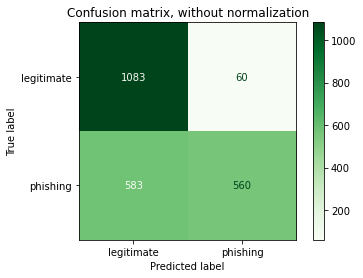

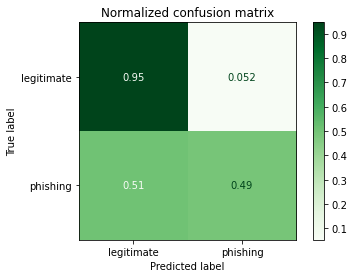

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

class_names = ["legitimate", "phishing"]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        testing_X,
        testing_y,
        display_labels = class_names,
        cmap = plt.cm.Greens,
        normalize = normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)